In [39]:
# Packages to import 

import re

import random
from PIL import Image
import seaborn as sns
import sklearn.decomposition
import sklearn.manifold
import umap #if missing: pip install umap
import scipy.stats



import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split

from sklearn import ensemble
from sklearn import tree as tree
print("done")

done


Installing a pip packages 

In [40]:
# Install a pip package in the current Jupyter kernel
#import sys
#!{sys.executable} -m pip install numpy
#print("done")

In [41]:
#import sys
#!conda install --yes --prefix {sys.prefix} umap-learn

In [42]:
#import sys
#!conda install --yes --prefix {sys.prefix} pandas


In [43]:
#conda install -c conda-forge/label/cf201901 umap-learn

In [44]:
import os

path = "E:\Data\krea\PIAAC"
os.chdir(path)
print("done")

done


read in data

In [169]:
itr = pd.read_stata('data\PIAAC_allcountries.dta', iterator = True)
labels = itr.variable_labels()
labels



{'cntry': 'Country ID and sub-national entity sample code (string)',
 'cntry_e': 'Participating country or sub-national entity code (string)',
 'reg_tl2': 'Geographical region - Respondent (OECD TL2) (coded)',
 'lng_bq': 'Language for background questionnaire (derived, ISO 639-2/T)',
 'lng_ci': 'Language for exercise (derived, ISO 639-2/T)',
 'ageg10lfs_t': 'Age in 10 year bands (Trend-IALS/ALL)',
 'iscoskil4': 'Occupational classification of respondents job (4 skill based categories), last',
 'isic1l': 'Industry classification of respondents job at 1-digit level(ISIC rev 4), last j',
 'isic2l': 'Industry classification of respondents job at 2-digit level (ISIC rev 4), last ',
 'isic1c': 'Industry classification of respondents job at 1-digit level (ISIC rev 4), curre',
 'isic2c': 'Industry classification of respondents job at 2-digit level (ISIC rev 4), curre',
 'isco1c': 'Occupational classification of respondents job at 1-digit level (ISCO 2008), cu',
 'isco2c': 'Occupational classif

In [ ]:
data = pd.read_stata('auto.dta', iterator = True)
labels = data.variable_labels()
labels

In [170]:
itr.describe() # By default only numeric fields are returned

AttributeError: 'StataReader' object has no attribute 'describe'

In [171]:
itr.describe(include='all')  

AttributeError: 'StataReader' object has no attribute 'describe'

In [172]:
for col in itr.columns: 
    print(col)

AttributeError: 'StataReader' object has no attribute 'columns'

In [173]:
print(itr.info())

AttributeError: 'StataReader' object has no attribute 'info'

In [174]:
pd.set_option('display.max_columns', 3500)

Subset the dataframe and removing columns of no interest to us

In [175]:
{itr.columns.get_loc(c): c for idx, c in enumerate(itr.columns)}

AttributeError: 'StataReader' object has no attribute 'columns'

In [49]:
#itr.hist(bins=30, figsize=(15, 10))

get rid of variables related to language, skills unrelated to ICT in everyday life, skills unrelated to ICT at work, bakcground info on household, ( maybe relevant - if so: include 262:270). 
Informaiton about education and training in b_q01-b_q12 
Immigration info is kept (271:274). Background info on parents is skipped except for their highest educational level (285, 297, zusammen 330). Included also 310  Yearly income percentile rank category (derived).
325:328, 314 --> highest educational level, also the years that were needed to tget the job.
344 --> Youth aged 16 to 24 who have left education without completing ISCED 3 or higher
345:361 --> participation in adult education training  formal or informal and 362:363 job-related or not , number of hours
paid job or not 

look for column number 
inpiaac --> piaac sample indicator


In [85]:
#itr.plot.hist(subplots=True, layout=(,4),figsize=(10, 10), bins=20)
#iris.plot.hist(subplots=True, layout=(2,2), figsize=(10, 10), bins=20)
piaac = itr[['Unnamed: 0','cntry','cntry_e', 'inpiaac', 'seqid' ,'cnt_brth','ageg10lfs', 'age_r', 'gender_r', 'j_q03b','j_q03b_c',
            'j_q04a',  'j_q04c1_c', 'pared', 'racethn_5cat',
            'computerexperience', 'isced_hf', 'isced_hf_c', 'cnt_h', 'yrsqual', 'yrsqual_t', 'yrsget', 
            'vet', 'edcat8', 'leaver1624',  'b_q01a', 'b_q01a_t', 'b_q01b', 'b_q01c1_c', 'b_d01d_c', 
             'b_q02a', 'b_q02a_t1', 'b_q02a_t2', 'b_q04a','b_q04b', 'b_q05c', 'b_q10a', 
             'b_q10b', 'b_q10c', 'b_q11', 'b_q12a','b_q12b',  'b_q12c', 'b_q12d', 'b_q12e', 'b_q12f',
             'b_q12g', 'b_q12h', 'b_d12h', 'b_q13', 'b_q14a', 'b_q14b', 'b_q15a', 'b_q15b', 'b_q15c', 'b_q16','b_q19a','b_q20b','b_q26a_t','b_q26b', 'isic1l', 'isic1c', 'iscoskil4',
             'isco1l','isco1c','c_q02a','c_q02c','c_d05','c_d06','c_q08c1_c','c_q08c2','c_q09',
            'c_d09', 'c_q10a', 'd_q03', 'd_q04', 'd_q04_t','d_q05a1_c', 'd_q05a2','d_q05b1_c','d_q05b2','d_q06a', 'd_q06b', 'd_q06c', 'd_q07a', 'd_q09',
            'd_q07b_c', 'd_q12a', 'd_q12b', 'd_q12c','d_q13c','d_q14', 'd_q16b','d_q16d5', 'e_q03','e_q04','e_q05a1_c','e_q05a2','e_q05b1_c','e_q05b2','e_q06','e_q07a','e_q07b',
            'e_q08','e_q10','f_q07a','f_q07b', 'g_q04','g_q05a','g_q05c','g_q05d','g_q05e','g_q05f','g_q05g','g_q05h','g_q06','g_q07','g_q08','learnatwork',  'readytolearn', 
             'icthome',  'ictwork', 'earnmthallppp', 'earnmthbonusppp', 'earnmthselfppp',
            'fe12','aetpop','faet12','faet12jr','faet12njr','nfe12','nfe12jr','nfe12njr','fnfaet12','fnfaet12jr','fnfaet12njr',
             'nfehrsnjr','nfehrsjr','nfehrs','nopaidworkever','unempflag']].copy()
piaac.describe()
print(piaac.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230691 entries, 0 to 230690
Columns: 141 entries, Unnamed: 0 to unempflag
dtypes: float64(130), int64(2), object(9)
memory usage: 248.2+ MB
None


In [86]:
for col in piaac.columns: 
    print(col)

Unnamed: 0
cntry
cntry_e
inpiaac
seqid
cnt_brth
ageg10lfs
age_r
gender_r
j_q03b
j_q03b_c
j_q04a
j_q04c1_c
pared
racethn_5cat
computerexperience
isced_hf
isced_hf_c
cnt_h
yrsqual
yrsqual_t
yrsget
vet
edcat8
leaver1624
b_q01a
b_q01a_t
b_q01b
b_q01c1_c
b_d01d_c
b_q02a
b_q02a_t1
b_q02a_t2
b_q04a
b_q04b
b_q05c
b_q10a
b_q10b
b_q10c
b_q11
b_q12a
b_q12b
b_q12c
b_q12d
b_q12e
b_q12f
b_q12g
b_q12h
b_d12h
b_q13
b_q14a
b_q14b
b_q15a
b_q15b
b_q15c
b_q16
b_q19a
b_q20b
b_q26a_t
b_q26b
isic1l
isic1c
iscoskil4
isco1l
isco1c
c_q02a
c_q02c
c_d05
c_d06
c_q08c1_c
c_q08c2
c_q09
c_d09
c_q10a
d_q03
d_q04
d_q04_t
d_q05a1_c
d_q05a2
d_q05b1_c
d_q05b2
d_q06a
d_q06b
d_q06c
d_q07a
d_q09
d_q07b_c
d_q12a
d_q12b
d_q12c
d_q13c
d_q14
d_q16b
d_q16d5
e_q03
e_q04
e_q05a1_c
e_q05a2
e_q05b1_c
e_q05b2
e_q06
e_q07a
e_q07b
e_q08
e_q10
f_q07a
f_q07b
g_q04
g_q05a
g_q05c
g_q05d
g_q05e
g_q05f
g_q05g
g_q05h
g_q06
g_q07
g_q08
learnatwork
readytolearn
icthome
ictwork
earnmthallppp
earnmthbonusppp
earnmthselfppp
fe12
aetpop
faet12
faet1

In [140]:
#matplotlib.rcParams.update({'font.size': 8, 'figure.figsize': (4, 3)})
#piaac.hist()

In [167]:
piaac.to_csv('piaac_reduced.csv')
print('done')

done


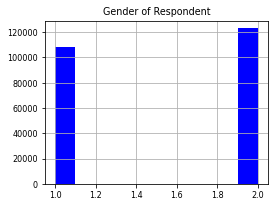

In [99]:
# the histogram of the data
n, bins, patches = plt.hist(piaac['gender_r'], facecolor='b')
plt.title('Gender of Respondent')
plt.grid(axis='both')






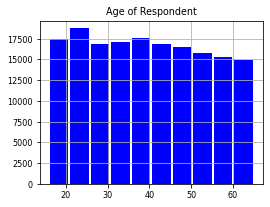

In [107]:
n, bins, patches = plt.hist(piaac['age_r'], facecolor='b', rwidth=0.9)
plt.title('Age of Respondent')
plt.grid(axis='both')

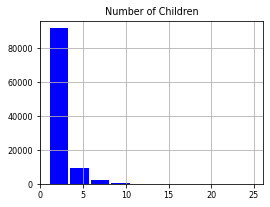

In [108]:
n, bins, patches = plt.hist(piaac['j_q03b'], facecolor='b', rwidth=0.9)
plt.title('Number of Children')
plt.grid(axis='both')

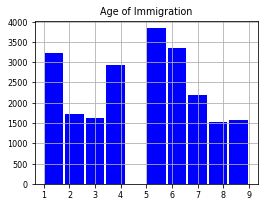

In [109]:
n, bins, patches = plt.hist(piaac['j_q04c1_c'], facecolor='b', rwidth=0.9)
plt.title('Age of Immigration')
plt.grid(axis='both')

Text(0, -20, '1=Hispanic, 2=White, 3=Black, 4=Asian/pacific, 6=Other')

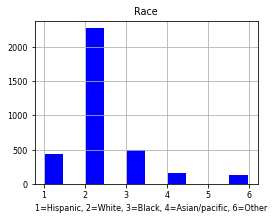

In [139]:
n, bins, patches = plt.hist(piaac['racethn_5cat'], facecolor='b', rwidth=0.9)
plt.title('Race')
plt.grid(axis='both')
plt.annotate('1=Hispanic, 2=White, 3=Black, 4=Asian/pacific, 6=Other', (0,0), (0, -20), xycoords='axes fraction', textcoords='offset points', va='top')

#plt.text(3,2000, '1=Hispanic, 2=White, 3=Black, 4=Asian/pacific, 6=Other')

# 1=Hispanic, 2=White, 3=Black, 4=Asian/pacific islander, 6=Other race

Text(0, -20, '1=Yes, 2=No')

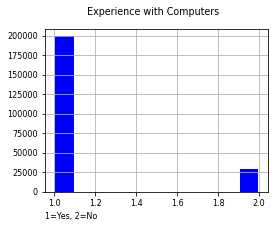

In [138]:
n, bins, patches = plt.hist(piaac['computerexperience'], facecolor='b', rwidth=0.9)
plt.suptitle('Experience with Computers')
plt.grid(axis='both')
plt.annotate('1=Yes, 2=No', (0,0), (0, -20), xycoords='axes fraction', textcoords='offset points', va='top')

#plt.text(3,2000, '1=Yes, 2=No')



Text(0, -20, '1=Primary, 2=Lower Secondary, 3=Upper Secondary, 4=Post-Secondary \n 5=Professional, 6=Bachelor, 7=Master, 8=research degree')

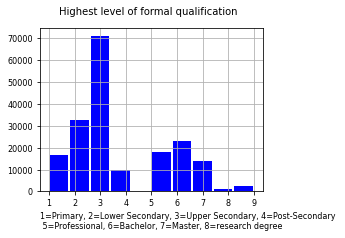

In [136]:
n, bins, patches = plt.hist(piaac['edcat8'], facecolor='b', rwidth=0.9)
plt.suptitle('Highest level of formal qualification', fontsize=10)
#plt.title('1=Primary, 2=Lower Secondary, 3=Upper Secondary, 4=Post-Secondary, 5=Professional, 6=Bachelor, 7=Master, 8=research degree', fontsize=10)
plt.grid(axis='both')
plt.annotate('1=Primary, 2=Lower Secondary, 3=Upper Secondary, 4=Post-Secondary \n 5=Professional, 6=Bachelor, 7=Master, 8=research degree', (0,0), (0, -20), xycoords='axes fraction', textcoords='offset points', va='top')


Text(0, -20, '0=Completed post-secondary or is still in education \n 1=Not in education, did not complete post-secondary')

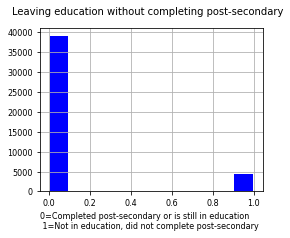

In [142]:
n, bins, patches = plt.hist(piaac['leaver1624'], facecolor='b', rwidth=0.9)
plt.suptitle('Leaving education without completing post-secondary', fontsize=10)
#plt.title('1=Primary, 2=Lower Secondary, 3=Upper Secondary, 4=Post-Secondary, 5=Professional, 6=Bachelor, 7=Master, 8=research degree', fontsize=10)
plt.grid(axis='both')
plt.annotate('0=Completed post-secondary or is still in education \n 1=Not in education, did not complete post-secondary', (0,0), (0, -20), xycoords='axes fraction', textcoords='offset points', va='top')


Text(0, -20, '1=No schooling, 2=Grades 1-6, 3=Grades 7-9, 4=High school diploma \n 5=Pre-associate education, 7=certificate prior to associate/bachelor, 8=Associate degree \n 9=Bachelor, 10=Master, 11=Professional, 12=Doctorate, 13=Foreign Degree')

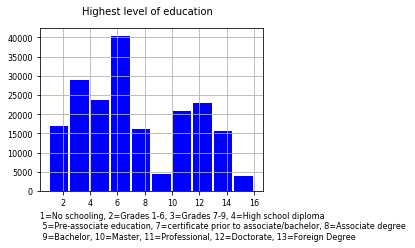

In [144]:
n, bins, patches = plt.hist(piaac['b_q01a'], facecolor='b', rwidth=0.9)
plt.suptitle('Highest level of education', fontsize=10)
#plt.title('1=Primary, 2=Lower Secondary, 3=Upper Secondary, 4=Post-Secondary, 5=Professional, 6=Bachelor, 7=Master, 8=research degree', fontsize=10)
plt.grid(axis='both')
plt.annotate('1=No schooling, 2=Grades 1-6, 3=Grades 7-9, 4=High school diploma \n 5=Pre-associate education, 7=certificate prior to associate/bachelor, 8=Associate degree \n 9=Bachelor, 10=Master, 11=Professional, 12=Doctorate, 13=Foreign Degree', (0,0), (0, -20), xycoords='axes fraction', textcoords='offset points', va='top')




Text(0, -20, '1=General programmes, 2=Teacher training and education science \n 3=Humanities, languages and arts, 4=Social sciences, business and law \n 5=Science, mathematics and computing, 6=Engineering, manufacturing and construction \n 7=Agriculture and veterinary, 8=Health and welfare, 9=Services')

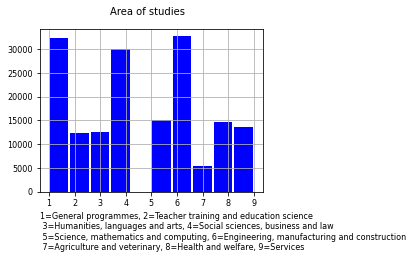

In [147]:
n, bins, patches = plt.hist(piaac['b_q01b'], facecolor='b', rwidth=0.9)
plt.suptitle('Area of studies', fontsize=10)
#plt.title('1=Primary, 2=Lower Secondary, 3=Upper Secondary, 4=Post-Secondary, 5=Professional, 6=Bachelor, 7=Master, 8=research degree', fontsize=10)
plt.grid(axis='both')
plt.annotate('1=General programmes, 2=Teacher training and education science \n 3=Humanities, languages and arts, 4=Social sciences, business and law \n 5=Science, mathematics and computing, 6=Engineering, manufacturing and construction \n 7=Agriculture and veterinary, 8=Health and welfare, 9=Services', (0,0), (0, -20), xycoords='axes fraction', textcoords='offset points', va='top')



Text(0, -20, '1=Yes, 2=No')

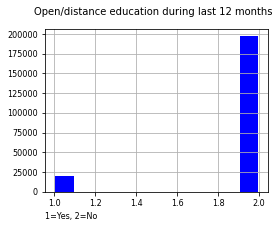

In [149]:
n, bins, patches = plt.hist(piaac['b_q12a'], facecolor='b', rwidth=0.9)
plt.suptitle('Open/distance education during last 12 months', fontsize=10)
#plt.title('1=Primary, 2=Lower Secondary, 3=Upper Secondary, 4=Post-Secondary, 5=Professional, 6=Bachelor, 7=Master, 8=research degree', fontsize=10)
plt.grid(axis='both')
plt.annotate('1=Yes, 2=No', (0,0), (0, -20), xycoords='axes fraction', textcoords='offset points', va='top')



Text(0, -20, '1=Yes, 2=No')

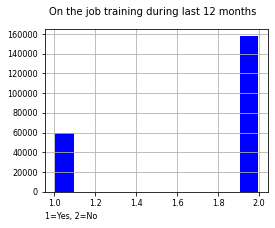

In [150]:
n, bins, patches = plt.hist(piaac['b_q12c'], facecolor='b', rwidth=0.9)
plt.suptitle('On the job training during last 12 months', fontsize=10)
#plt.title('1=Primary, 2=Lower Secondary, 3=Upper Secondary, 4=Post-Secondary, 5=Professional, 6=Bachelor, 7=Master, 8=research degree', fontsize=10)
plt.grid(axis='both')
plt.annotate('1=Yes, 2=No', (0,0), (0, -20), xycoords='axes fraction', textcoords='offset points', va='top')



Text(0, -20, '1=Yes, 2=No')

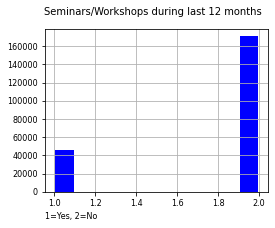

In [151]:
n, bins, patches = plt.hist(piaac['b_q12e'], facecolor='b', rwidth=0.9)
plt.suptitle('Seminars/Workshops during last 12 months', fontsize=10)
#plt.title('1=Primary, 2=Lower Secondary, 3=Upper Secondary, 4=Post-Secondary, 5=Professional, 6=Bachelor, 7=Master, 8=research degree', fontsize=10)
plt.grid(axis='both')
plt.annotate('1=Yes, 2=No', (0,0), (0, -20), xycoords='axes fraction', textcoords='offset points', va='top')



Text(0, -20, '1=Yes, 2=No')

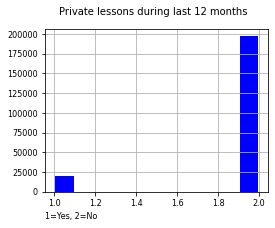

In [152]:
n, bins, patches = plt.hist(piaac['b_q12g'], facecolor='b', rwidth=0.9)
plt.suptitle('Private lessons during last 12 months', fontsize=10)
#plt.title('1=Primary, 2=Lower Secondary, 3=Upper Secondary, 4=Post-Secondary, 5=Professional, 6=Bachelor, 7=Master, 8=research degree', fontsize=10)
plt.grid(axis='both')
plt.annotate('1=Yes, 2=No', (0,0), (0, -20), xycoords='axes fraction', textcoords='offset points', va='top')



Text(0, -20, '1=open/distance educational course, 2=on-the-job-training \n 3=seminar/workshop, 4=other/private lesson')

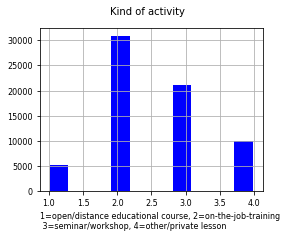

In [154]:
n, bins, patches = plt.hist(piaac['b_q13'], facecolor='b', rwidth=0.9)
plt.suptitle('Kind of activity', fontsize=10)
#plt.title('1=Primary, 2=Lower Secondary, 3=Upper Secondary, 4=Post-Secondary, 5=Professional, 6=Bachelor, 7=Master, 8=research degree', fontsize=10)
plt.grid(axis='both')
plt.annotate('1=open/distance educational course, 2=on-the-job-training \n 3=seminar/workshop, 4=other/private lesson', (0,0), (0, -20), xycoords='axes fraction', textcoords='offset points', va='top')



Text(0, -20, '1=Yes, 2=No')

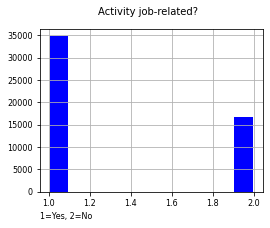

In [155]:
n, bins, patches = plt.hist(piaac['b_q14a'], facecolor='b', rwidth=0.9)
plt.suptitle('Activity job-related?', fontsize=10)
#plt.title('1=Primary, 2=Lower Secondary, 3=Upper Secondary, 4=Post-Secondary, 5=Professional, 6=Bachelor, 7=Master, 8=research degree', fontsize=10)
plt.grid(axis='both')
plt.annotate('1=Yes, 2=No', (0,0), (0, -20), xycoords='axes fraction', textcoords='offset points', va='top')



Text(0, -20, '1=To do my job better and/or improve career prospects \n 2=To be less likely to lose my job \n 3=To increase my possibilities of getting a job, or changing a job or profession \n 4=To start my own business \n 5=I was obliged to participate \n 6=To increase my knowledge or skills on a subject that interests me \n 7=To obtain a certificate, 8=8Other')

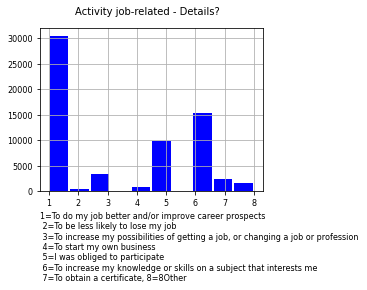

In [157]:
n, bins, patches = plt.hist(piaac['b_q14b'], facecolor='b', rwidth=0.9)
plt.suptitle('Activity job-related - Details?', fontsize=10)
#plt.title('1=Primary, 2=Lower Secondary, 3=Upper Secondary, 4=Post-Secondary, 5=Professional, 6=Bachelor, 7=Master, 8=research degree', fontsize=10)
plt.grid(axis='both')
plt.annotate('1=To do my job better and/or improve career prospects \n 2=To be less likely to lose my job \n 3=To increase my possibilities of getting a job, or changing a job or profession \n 4=To start my own business \n 5=I was obliged to participate \n 6=To increase my knowledge or skills on a subject that interests me \n 7=To obtain a certificate, 8=8Other', (0,0), (0, -20), xycoords='axes fraction', textcoords='offset points', va='top')


Text(0, -20, '1=Yes, 2=No')

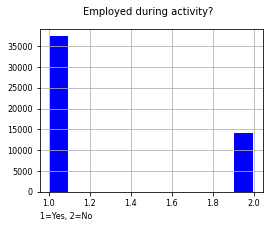

In [158]:
n, bins, patches = plt.hist(piaac['b_q15a'], facecolor='b', rwidth=0.9)
plt.suptitle('Employed during activity?', fontsize=10)
#plt.title('1=Primary, 2=Lower Secondary, 3=Upper Secondary, 4=Post-Secondary, 5=Professional, 6=Bachelor, 7=Master, 8=research degree', fontsize=10)
plt.grid(axis='both')
plt.annotate('1=Yes, 2=No', (0,0), (0, -20), xycoords='axes fraction', textcoords='offset points', va='top')



Text(0, -20, '1=Employed, 2=Unemployed, 3=Retired, 4=Not known')

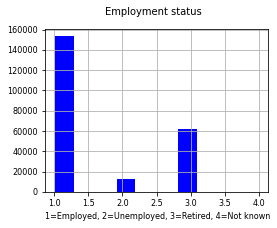

In [163]:
n, bins, patches = plt.hist(piaac['c_d05'], facecolor='b', rwidth=0.9)
plt.suptitle('Employment status', fontsize=10)
#plt.title('1=Primary, 2=Lower Secondary, 3=Upper Secondary, 4=Post-Secondary, 5=Professional, 6=Bachelor, 7=Master, 8=research degree', fontsize=10)
plt.grid(axis='both')
plt.annotate('1=Employed, 2=Unemployed, 3=Retired, 4=Not known', (0,0), (0, -20), xycoords='axes fraction', textcoords='offset points', va='top')
